# EDA

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

*******************************************************************************************************************************
# Overview
*******************************************************************************************************************************

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_df.loc[(train_df['TotalBsmtSF']==0), ['BsmtFullBath', 'BsmtHalfBath']]

,BsmtFullBath,BsmtHalfBath
17,0,0
39,0,0
90,0,0
102,0,0
156,0,0
182,0,0
259,0,0
342,0,0
362,0,0
371,0,0


## Data fields 
_(Kaggle Referrence)_

__SalePrice__: the property's sale price in dollars. This is the target variable that you're trying to predict.
<br>__MSSubClass__: The building class
<br>__MSZoning__: The general zoning classification
<br>__LotFrontage__: Linear feet of street connected to property
<br>__LotArea__: Lot size in square feet
<br>__Street__: Type of road access
<br>__Alley__: Type of alley access
<br>__LotShape__: General shape of property
<br>__LandContour__: Flatness of the property
<br>__Utilities__: Type of utilities available
<br>__LotConfig__: Lot configuration
<br>__LandSlope__: Slope of property
<br>__Neighborhood__: Physical locations within Ames city limits
<br>__Condition1__: Proximity to main road or railroad
<br>__Condition2__: Proximity to main road or railroad (if a second is present)
<br>__BldgType__: Type of dwelling
<br>__HouseStyle__: Style of dwelling
<br>__OverallQual__: Overall material and finish quality
<br>__OverallCond__: Overall condition rating
<br>__YearBuilt__: Original construction date
<br>__YearRemodAdd__: Remodel date
<br>__RoofStyle__: Type of roof
<br>__RoofMatl__: Roof material
<br>__Exterior1st__: Exterior covering on house
<br>__Exterior2nd__: Exterior covering on house (if more than one material)
<br>__MasVnrType__: Masonry veneer type
<br>__MasVnrArea__: Masonry veneer area in square feet
<br>__ExterQual__: Exterior material quality
<br>__ExterCond__: Present condition of the material on the exterior
<br>__Foundation__: Type of foundation
<br>__BsmtQual__: Height of the basement
<br>__BsmtCond__: General condition of the basement
<br>__BsmtExposure__: Walkout or garden level basement walls
<br>__BsmtFinType1__: Quality of basement finished area
<br>__BsmtFinSF1__: Type 1 finished square feet
<br>__BsmtFinType2__: Quality of second finished area (if present)
<br>__BsmtFinSF2__: Type 2 finished square feet
<br>__BsmtUnfSF__: Unfinished square feet of basement area
<br>__TotalBsmtSF__: Total square feet of basement area
<br>__Heating__: Type of heating
<br>__HeatingQC__: Heating quality and condition
<br>__CentralAir__: Central air conditioning
<br>__Electrical__: Electrical system
<br>__1stFlrSF__: First Floor square feet
<br>__2ndFlrSF__: Second floor square feet
<br>__LowQualFinSF__: Low quality finished square feet (all floors)
<br>__GrLivArea__: Above grade (ground) living area square feet
<br>__BsmtFullBath__: Basement full bathrooms
<br>__BsmtHalfBath__: Basement half bathrooms
<br>__FullBath__: Full bathrooms above grade
<br>__HalfBath__: Half baths above grade
<br>__Bedroom__: Number of bedrooms above basement level
<br>__Kitchen__: Number of kitchens
<br>__KitchenQual__: Kitchen quality
<br>__TotRmsAbvGrd__: Total rooms above grade (does not include bathrooms)
<br>__Functional__: Home functionality rating
<br>__Fireplaces__: Number of fireplaces
<br>__FireplaceQu__: Fireplace quality
<br>__GarageType__: Garage location
<br>__GarageYrBlt__: Year garage was built
<br>__GarageFinish__: Interior finish of the garage
<br>__GarageCars__: Size of garage in car capacity
<br>__GarageArea__: Size of garage in square feet
<br>__GarageQual__: Garage quality
<br>__GarageCond__: Garage condition
<br>__PavedDrive__: Paved driveway
<br>__WoodDeckSF__: Wood deck area in square feet
<br>__OpenPorchSF__: Open porch area in square feet
<br>__EnclosedPorch__: Enclosed porch area in square feet
<br>__3SsnPorch__: Three season porch area in square feet
<br>__ScreenPorch__: Screen porch area in square feet
<br>__PoolArea__: Pool area in square feet
<br>__PoolQC__: Pool quality
<br>__Fence__: Fence quality
<br>__MiscFeature__: Miscellaneous feature not covered in other categories
<br>__MiscVal__: $Value of miscellaneous feature
<br>__MoSold__: Month Sold
<br>__YrSold__: Year Sold
<br>__SaleType__: Type of sale
<br>__SaleCondition__: Condition of sale

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
rows = train_df.shape[0]
cols = train_df.shape[1]
print("Records: {} \nFeatures: {}".format(rows, cols))
total_values = rows*cols
null_values = train_df.isnull().sum().sum()
per_null_values = round((null_values/total_values)*100,2)
print("Null Values: {} \nTotal Values: {}".format(null_values, total_values))
print("Percentage of Null values: {} %".format(per_null_values))

Records: 1460 
Features: 81
Null Values: 6965 
Total Values: 118260
Percentage of Null values: 5.89 %


In [11]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
train_df.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


*******************************************************************************************************************************
# Check Null and Distribution for Each Feature
*******************************************************************************************************************************

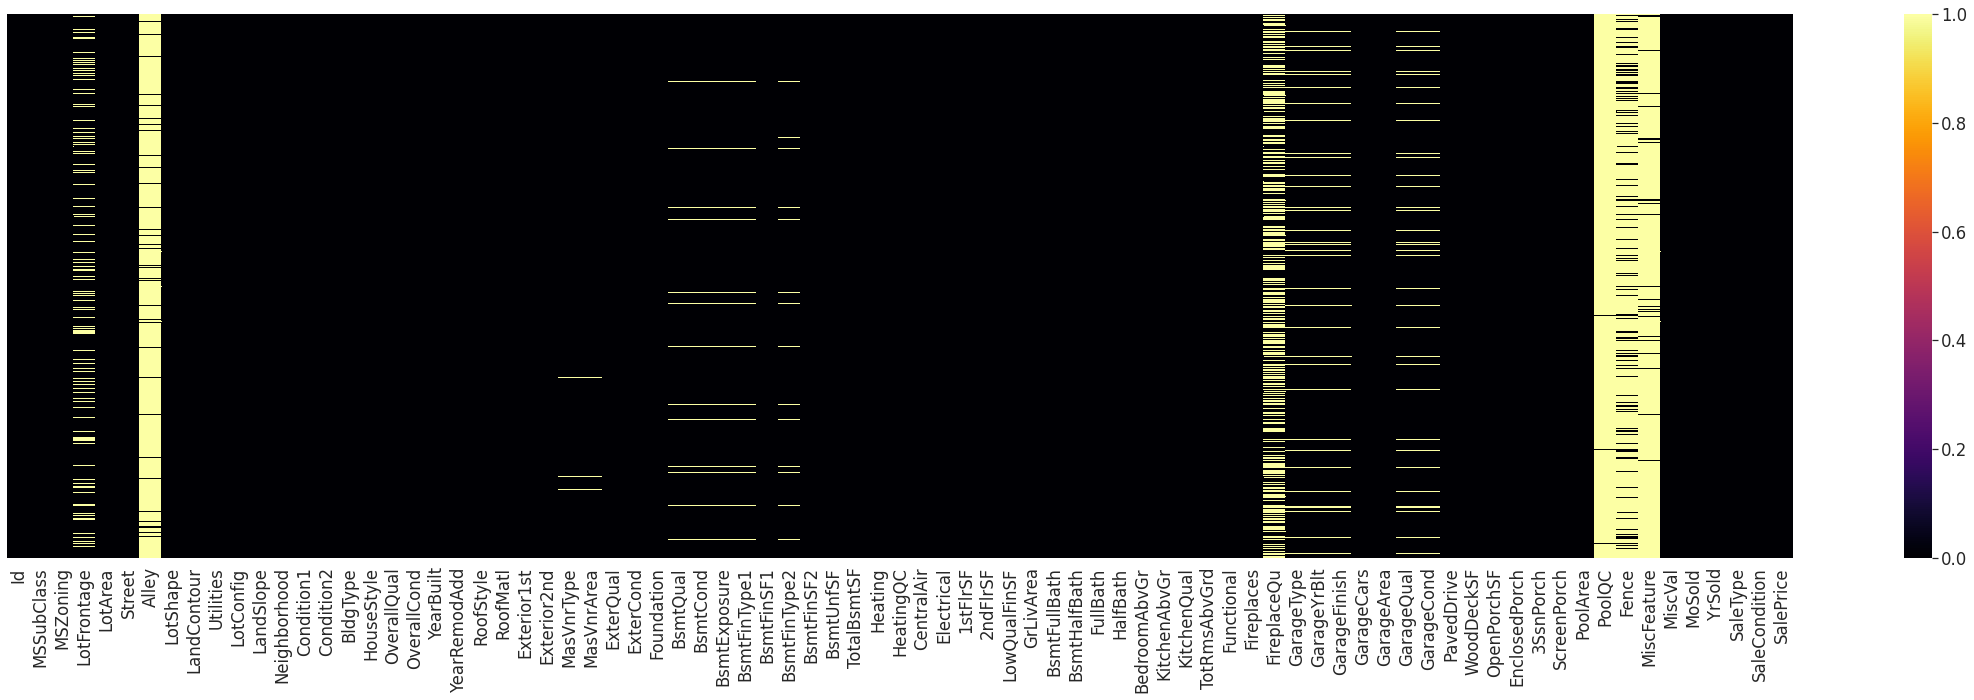

In [ ]:
# Missing Values Plot
plt.figure(figsize=(40,10))
sns.heatmap(train_df.isnull(), yticklabels=False, cmap='inferno')

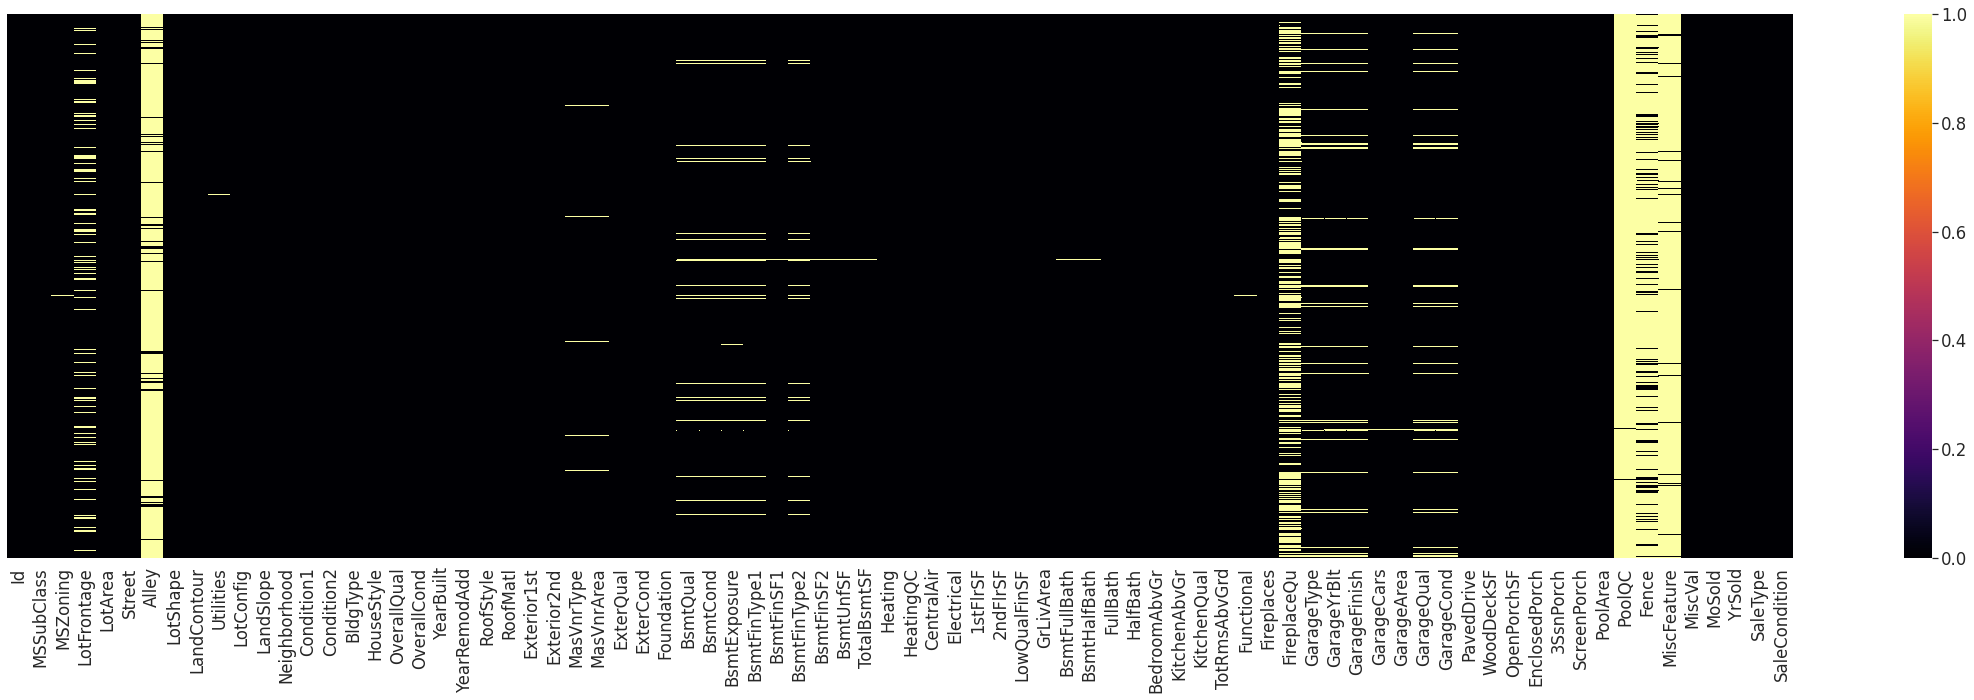

In [ ]:
# Missing Values Plot
plt.figure(figsize=(40,10))
sns.heatmap(test_df.isnull(), yticklabels=False, cmap='inferno')

__[1] SalePrice__: the property's sale price in dollars. This is the target variable that you're trying to predict.

In [ ]:
train_df['SalePrice'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


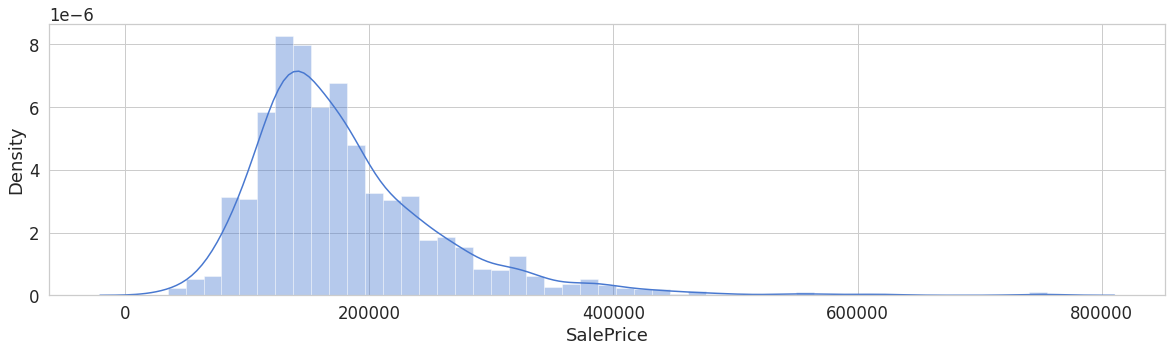

In [ ]:
plt.figure(figsize=(20,5))
sns.distplot(train_df['SalePrice'])

*******************************************************************************************************************************
# Analysis among features
*******************************************************************************************************************************

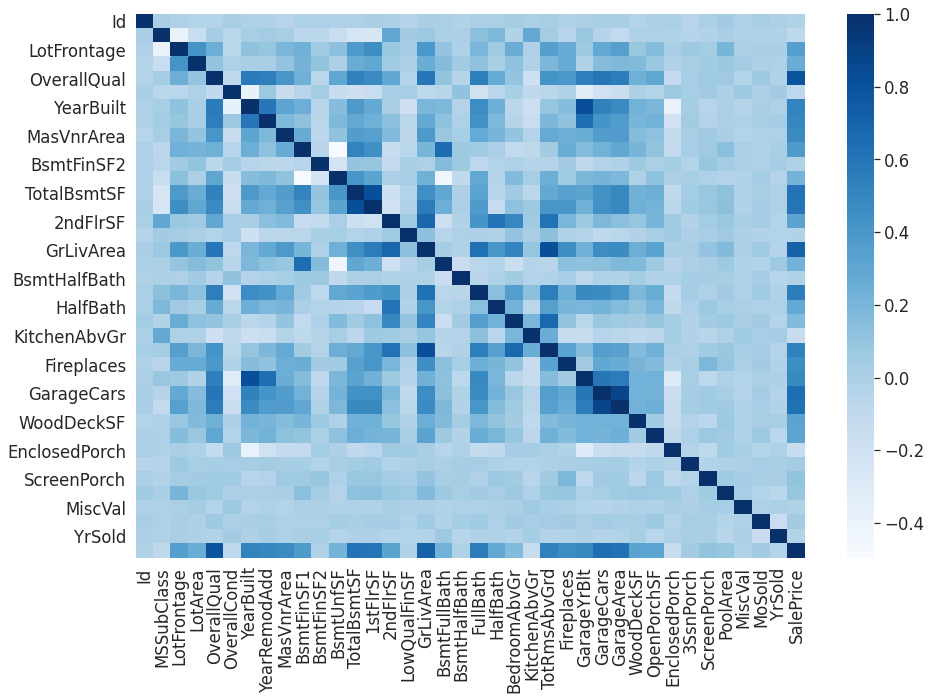

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr(), cmap='Blues')

In [ ]:
# Correlation of Features with SalePrice
corr_df = pd.DataFrame(train_df.corr()['SalePrice']).sort_values(by=['SalePrice'], ascending=False).drop(['SalePrice'], axis=0)
corr_df

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


In [ ]:
# Most co-related features with sales price (Considering limit of [-1, -0.6] and [0.6, 1])
highly_corr_featues = list(corr_df.loc[(corr_df['SalePrice']>=0.6) | (corr_df['SalePrice']<=-0.6)].index)
corr_df.loc[(corr_df['SalePrice']>=0.6) | (corr_df['SalePrice']<=-0.6)]

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852


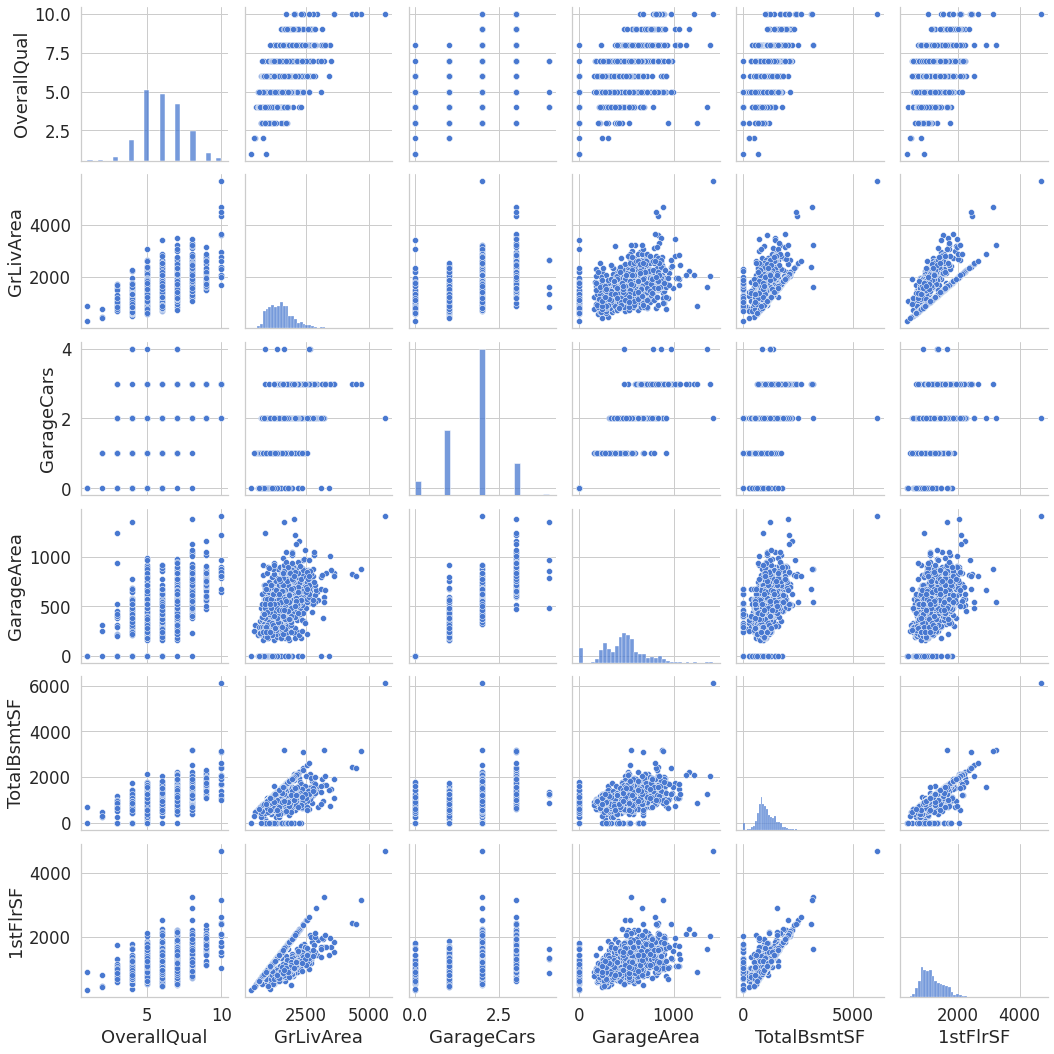

In [ ]:
# Pair Plot of features which are highly co-related with Sales Price
sns.pairplot(train_df[highly_corr_featues])